# Como usar o Bitcoin numa carteira conservadora

O Bitcoin desde seu surgimento é motivo de várias controvérsias no mercado financeiro. Apesar de já ser levado a sério por muitas empresas e gestores no exterior, é ainda motivo de confusão no Brasil. Não querendo entrar no debate filosófico neste momento de onde vem o valor do Bitcoin, mas fazendo apenas uma análise quantitativa, será que vale a pena investir em Bitcoin?

![Volatilidade do Bitcoin](img/bitcoin_vol.png)

Já é amplamente conhecido que a volatilidade do Bitcoin é muito alta, mas o que todo gestor deveria se perguntar é qual é a retorno por unidade de volatilidade, ou seja, o índice Sharpe. Surpreendente para os descrentes, o Bitcoin hoje tem o maior Sharpe entre vários grupos de ativos como ações dos EUA, bonds, ouro, petróleo e moedas de países emergentes.

![Sharpe do Bitcoin](img/bitcoin_sharpe.png)

Mas como podemos aproveitar desse retorno sem aumentar muito a risco da carteira?
Vamos fazer um teste arriscar 2% do portfólio, enquanto todo o resto concentramos em Tesouro Selic?
(Para simplificar, usei os dados do CDI da [B3](http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/serie-historica-do-di.htm), já que são muito próximos)

## Pegando os dados

Essas são as bibliotecas que vou usar

In [9]:
%matplotlib notebook

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pandas as pd
import numpy as np
from functools import reduce
import datetime
from cryptodata import download_mercadobtc
import matplotlib.pyplot as plt

In [12]:
from IPython.display import clear_output, display

### Bitcoin

O código abaixo já salva um arquivo csv para importarmos no pandas em seguida

In [ ]:
download_mercadobtc.download_btc_from_mbtc()

In [13]:
btc = pd.read_csv('cryptodata/btcbrl.csv', parse_dates=['date'])[::-1].set_index('date')

Vamos calcular o retorno diário par facilitar os cálculos mais para frente

In [14]:
btc["btc_daily_return"] = btc["closing"] / btc["closing"].shift(1)

Vamos ver como está o arquivo e ver se não tem nada errado

In [15]:
btc.head()

,opening,closing,lowest,highest,volume,quantity,amount,avg_price,btc_daily_return
date,,,,,,,,,
2013-06-12,249.00,265.00,249.00,275.00,2799.690778,10.916965,11,256.453225,NaN
2013-06-13,265.00,269.00,259.00,269.00,2830.406722,10.624724,16,266.398141,1.015094
2013-06-14,267.00,250.00,245.00,268.00,8694.710569,34.040328,35,255.423818,0.929368
2013-06-15,250.00,246.01,246.01,259.99,4481.405612,17.445940,8,256.873845,0.984040
2013-06-16,246.01,252.00,246.01,257.43,427.690102,1.669200,14,256.224600,1.024349


In [16]:
btc.tail()

,opening,closing,lowest,highest,volume,quantity,amount,avg_price,btc_daily_return
date,,,,,,,,,
2019-07-07,43301.12000,43701.00000,43000.0,43990.00,3.302460e+06,75.654598,2868,43651.811237,1.008143
2019-07-08,43711.00000,47000.00000,43700.0,47602.10,3.813110e+07,837.221189,19888,45544.837677,1.075490
2019-07-09,47100.00000,48200.97003,46100.0,49000.00,2.937920e+07,618.884554,17168,47471.205905,1.025553
2019-07-10,48389.93994,45789.99993,44102.0,49800.00,4.607897e+07,978.244737,23162,47103.721927,0.949981
2019-07-11,45552.06004,43430.00000,42600.0,45899.09,3.301337e+07,743.020634,14956,44431.298555,0.948460


### CDI

Esses dados eu peguei direto da página da [B3](http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/serie-historica-do-di.htm)

In [17]:
# http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/serie-historica-do-di.htm
from datetime import datetime
to_datetime = lambda d: datetime.strptime(d, '%d/%m/%Y')
cdi = pd.read_csv("data/CDI.csv", converters={'Data': to_datetime}).set_index("Data")

Vamos conferir se faz sentido. O fator diário é a valorização diária do CDI, que é o que usaremos.

In [18]:
cdi.head()

,Nr. Operações,Volume,Média,Fator Diário,Mínima,Máxima,Moda,Dsv Pdr,Taxa SELIC
Data,,,,,,,,,
2013-06-12,24,2018533.84,7.72,1.000295,7.6,7.75,7.7,0.011091,7.9
2013-06-13,24,1981604.03,7.72,1.000295,7.6,7.75,7.7,0.011314,7.9
2013-06-14,25,2039245.26,7.72,1.000295,7.6,7.75,7.7,0.011045,7.9
2013-06-17,22,1919790.55,7.72,1.000295,7.67,7.75,7.7,0.006708,7.9
2013-06-18,23,1932724.05,7.72,1.000295,7.67,7.75,7.7,0.007937,7.9


In [19]:
cdi.tail()

,Nr. Operações,Volume,Média,Fator Diário,Mínima,Máxima,Moda,Dsv Pdr,Taxa SELIC
Data,,,,,,,,,
2019-07-05,5,3807885.92,6.4,1.000246,-,-,-,-,6.4
2019-07-08,6,3831979.76,6.4,1.000246,-,-,-,-,6.4
2019-07-09,7,3819083.94,6.4,1.000246,-,-,-,-,6.4
2019-07-10,6,3710362.22,6.4,1.000246,-,-,-,-,6.4
2019-07-11,6,3725916.96,6.4,1.000246,-,-,-,-,6.4


In [20]:
print('A variação do CDI no período foi de :', (reduce(lambda x, y: x*y, cdi['Fator Diário']) - 1) * 100, "%")
print('A variação do BTC no período foi de :', (reduce(lambda x, y: x*y, btc['btc_daily_return'][1:]) - 1) * 100, "%")
#cdi_return = cdi['Fator Diário'].apply(np.sum, axis=1)

A variação do CDI no período foi de : 81.31281797281855 %
A variação do BTC no período foi de : 16288.679245283021 %


#### Retorno acumulado no período

In [21]:
a = pd.merge(btc['btc_daily_return'], cdi['Fator Diário'], how='outer', left_index=True, right_index=True).fillna(1)
a = a.rename(columns={'Fator Diário': 'CDI', 'btc_daily_return': 'BTC'})
a.head()
a.cumprod().tail()

,BTC,CDI
2019-07-07,164.909434,1.811344
2019-07-08,177.358491,1.811790
2019-07-09,181.890453,1.812236
2019-07-10,172.792453,1.812682
2019-07-11,163.886792,1.813128


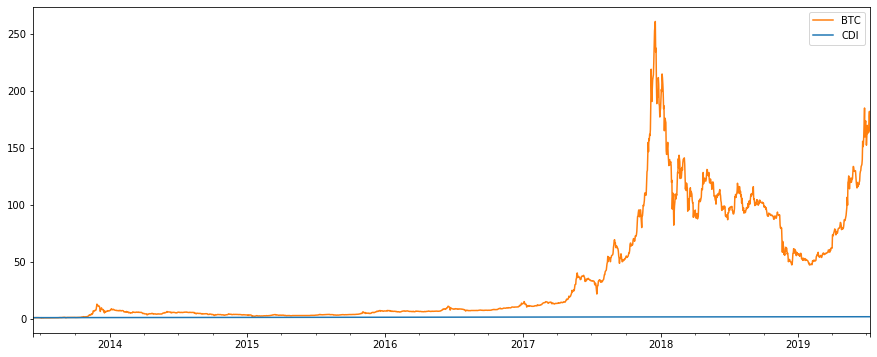

In [22]:
a.cumprod().plot(figsize=(15,6), color=['#ff7f0e','#1f77b4'])

## Construção de portfólio

Mas vamos diminuir esse nosso risco. Não é ideal ter 100% em BTC, pois podemos sofrer muito com a queda.
Vamos ver o que acontece se arriscarmos só 2% do patrimônio em BTC.

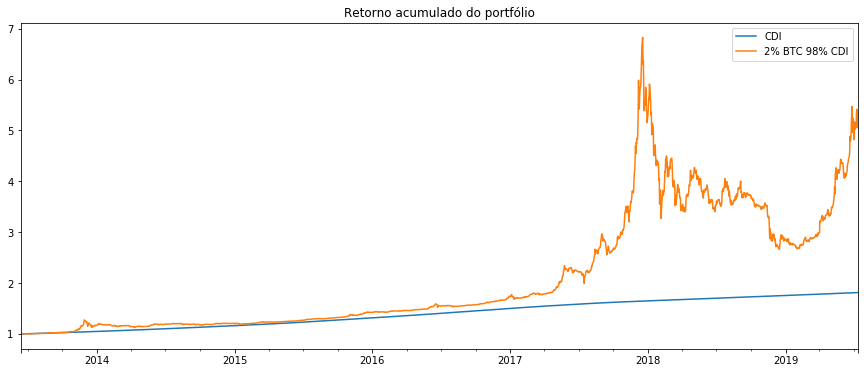

In [23]:
perc2 = pd.DataFrame(a['BTC'].cumprod() * 0.02 + a["CDI"].cumprod() * 0.98, columns=["2% BTC 98% CDI"])
#perc5 = pd.DataFrame(a['BTC'].cumprod() * 0.05 + a["CDI"].cumprod() * 0.95, columns=["5% BTC 95% CDI"])
#perc10 = pd.DataFrame(a['BTC'].cumprod() * 0.10 + a["CDI"].cumprod() * 0.90, columns=["10% BTC 90% CDI"])

portfolios = pd.merge(a["CDI"].cumprod(), perc2, how='outer', left_index=True, right_index=True)
#portfolios = pd.merge(portfolios, perc5, how='outer', left_index=True, right_index=True)
#portfolios = pd.merge(portfolios, perc10, how='outer', left_index=True, right_index=True)
portfolios.plot(figsize=(15,6), title="Retorno acumulado do portfólio")

In [24]:
portfolios.head()

,CDI,2% BTC 98% CDI
2013-06-12,1.000295,1.000289
2013-06-13,1.000590,1.000880
2013-06-14,1.000886,0.999736
2013-06-15,1.000886,0.999435
2013-06-16,1.000886,0.999887


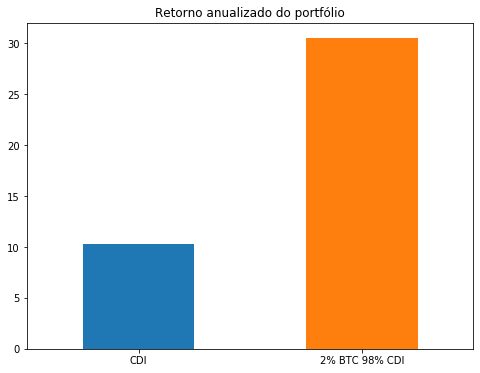

In [27]:
fig = plt.figure()

ann_return = (portfolios.iloc[-1] ** (365 / len(portfolios)) - 1) * 100

#plt.bar(list(ann_return.iloc[0].index),ann_return.iloc[0].values, color=['#1f77b4','#ff7f0e'], align='center')


ann_return.plot.bar(figsize=(8,6), rot=0, title='Retorno anualizado do portfólio', color=['#1f77b4','#ff7f0e'])

Mas nem todo mundo teve a sorte de entrar no início.
O que aconteceria se alguém comprasse 2% do patrimônio em BTC num momento aleatório da história e segurasse até hoje?

In [28]:
portfolios = pd.merge(a["CDI"].cumprod(), a["BTC"].cumprod(), how='outer', left_index=True, right_index=True)
portfolios["2% BTC 98% CDI"] = portfolios["CDI"]
portfolios["100% CDI"] = portfolios["CDI"]

for i in range(len(portfolios)):
    cdi_helper = portfolios["CDI"]/portfolios["CDI"].iloc[i]
    btc_helper = portfolios["BTC"]/portfolios["BTC"].iloc[i]
    portfolios["2% BTC 98% CDI"].iloc[i] = ((0.98 * (portfolios["CDI"].iloc[-1] / portfolios["CDI"].iloc[i]) 
                                            + 0.02 * (portfolios["BTC"].iloc[-1] / portfolios["BTC"].iloc[i])) 
                                            ** ( 365 / (len(portfolios) - i)) - 1) * 100
    portfolios["100% CDI"].iloc[i] = ((portfolios["CDI"].iloc[-1] / portfolios["CDI"].iloc[i]) 
                                      ** ( 365 / (len(portfolios) - i)) - 1) * 100

### Retorno anualizado de acordo com a data de entrada 

Retorno anualizado até 07/07/2019 de acordo com a data de entrada.

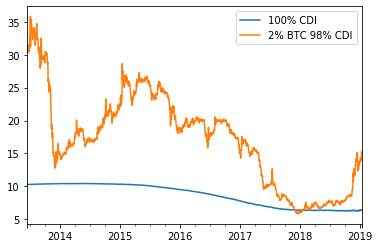

In [29]:
portfolios[['100% CDI', '2% BTC 98% CDI']].iloc[:-180].plot()

In [36]:
diff = portfolios['2% BTC 98% CDI'].iloc[:-180] - portfolios['100% CDI'].iloc[:-180]
print("Se entrar num ponto aleatório no tempo, ganharia em média {0:.2f}%, que representa {1:.2f}% acima do CDI"
      .format(portfolios['2% BTC 98% CDI'].iloc[:-180].mean(), diff.mean()))

percent = portfolios['2% BTC 98% CDI'] / portfolios['100% CDI'] * 100
print("Se entrar num ponto aleatório no tempo, ganharia em média {0:.2f}% do CDI".format(percent.iloc[:-180].mean()))

print("Se entrar no pior momento da história, teria {0:.2f}% de retorno anualizado".format(portfolios['2% BTC 98% CDI'].iloc[:-180].min()))
print("Se entrar no melhor momento da história, teria {0:.2f}% de retorno anualizado".format(portfolios['2% BTC 98% CDI'].iloc[:-180].max()))

Se entrar num ponto aleatório no tempo, ganharia em média 17.09%, que representa 8.44% acima do CDI
Se entrar num ponto aleatório no tempo, ganharia em média 191.02% do CDI
Se entrar no pior momento da história, teria 5.80% de retorno anualizado
Se entrar no melhor momento da história, teria 35.85% de retorno anualizado


In [37]:
from celluloid import Camera

2120 de 2120


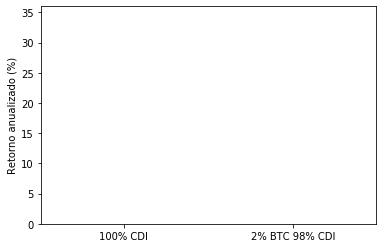

In [38]:
fig, ax = plt.subplots()
camera = Camera(fig)

p = portfolios[['100% CDI', '2% BTC 98% CDI']]

for i in range(len(portfolios) - 100):
    clear_output(wait=True)
    print("{} de {}".format(i,len(portfolios) - 101))
    plt.bar(list(p.iloc[i].index),p.iloc[i].values, color=['#1f77b4','#ff7f0e'], align='center')
    plt.text(0.5, 1.01, 'Retorno anualizado de {} a {}'
             .format(p.iloc[i].name.strftime("%d/%m/%Y"), p.iloc[-1].name.strftime("%d/%m/%Y")), 
                     horizontalalignment='center', verticalalignment='bottom', transform=ax.transAxes)
    #plt.title('Retorno anualizado de {} a {}'.format(p.iloc[i].name.strftime("%d/%m/%Y"), p.iloc[-1].name.strftime("%d/%m/%Y"))
    plt.ylabel('Retorno anualizado (%)')
    plt.ylim(0,36)
    camera.snap()

animation = camera.animate(interval=25, blit=True)
plt.show()

animation.save('data/portfolio_btc_vs_cdi.mp4')
#animation.save('teste.gif', writer = 'imagemagick')